## 3. Cora dataset
***
One of the well-known categories of machine learning problems is “supervised learning”. In supervised learning, we are given some information called “input” features about certain objects. For each object, we are also given an “output” or target variable that we are trying to predict about. Our goal is to learn the mapping between the features and the target variable. Typically, there is a portion of data where both input features and target variables are available. This portion of the dataset is called the training set. There is also typically another portion of the dataset where the target variable is missing and we want to predict it. This portion is called the “test set”. When the target variable can take on a finite number of discrete values, we call the problem at hand a “classification” problem. In this project, we are trying to solve a classification problem in settings where some additional information is provided in the form of “graph structure”. In this project we work with “Cora” dataset. Cora consists of a set of 2708 documents that are Machine Learning related papers. Each documents is labeled with one of the following seven classes: Case Based, Genetic Algorithms, Neural Networks, Probabilistic Methods, Reinforcement Learning, Rule Learning, Theory. For each class, only 20 documents are labeled (a total of 140 for the seven classes). We refer to them as “seed” documents. Each document comes with a set of features about its text content. These features are occurrences of a selection of 1433 words in the vocabulary. We are also given an undirected graph where each node is a document and each edge represents a citation. There are a total of 5429 edges. Our goal is to use the hints from text features as well as from graph connections to classify (assign labels to) these documents. To solve this problem for Cora dataset, we pursue three parallel ideas. Implement each idea and compare.

### Load Cora Dataset
***

Processing...
Done!


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


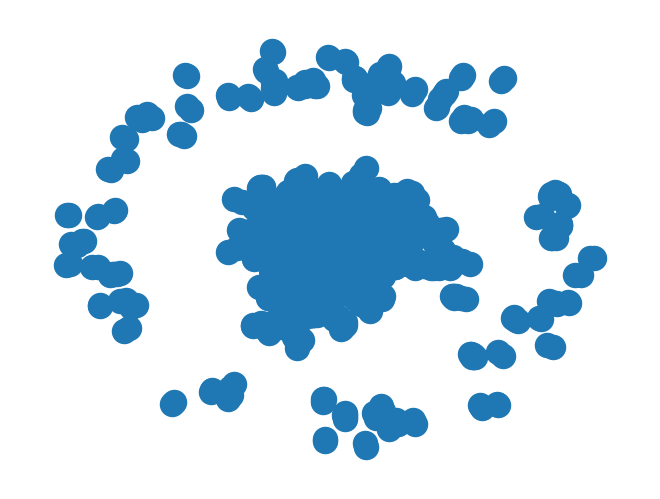

In [1]:
import networkx as nx
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx


dataset = Planetoid(root="./data/Cora", name="Cora")

data = dataset[0]
print(f"Dataset: {dataset}:")
print("======================")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of features: {dataset.num_features}")
print(f"Number of classes: {dataset.num_classes}")

print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Average node degree: {data.num_edges / data.num_nodes:.2f}")
print(f"Number of training nodes: {data.train_mask.sum()}")
print(f"Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}")
print(f"Contains isolated nodes: {data.contains_isolated_nodes()}")
print(f"Contains self-loops: {data.contains_self_loops()}")
print(f"Is undirected: {data.is_undirected()}")

G = to_networkx(data, to_undirected=True)
nx.draw(G)

#### QUESTION 23: Idea 1
Use Graph Convolutional Networks [1]. What hyperparameters do you choose to get the optimal performance? How many layers did you choose?

Ref: [1] Kipf, Thomas N., and Max Welling. “Semi-supervised classification with graph convolutional networks.” arXiv preprint arXiv:1609.02907 (2016).

#### QUESTION 24: Idea 2
Extract structure-based node features using Node2Vec [2]. Briefly describe how Node2Vec finds node features. Choose your desired classifier (one of SVM, Neural Network, or Random Forest) and classify the documents using only Node2Vec (graph structure) features. Now classify the documents using only the 1433-dimensional text features. Which one outperforms? Why do you think this is the case? Combine the Node2Vec and text features and train your classifier on the combined features. What is the best classification accuracy you get (in terms of the percentage of test documents correctly classified)?

#### QUESTION 25: Idea 3
We can find the personalized PageRank of each document in seven different runs, one per class. In each run, select one of the classes and take the 20 seed documents of that class. Then, perform a random walk with the following customized properties: (a) teleportation takes the random walker to one of the seed documents of that class (with a uniform probability of 1/20 per seed document). Vary the teleportation probability in {0, 0.1, 0.2}. (b) the probability of transitioning to neighbors is not uniform among the neighbors. Rather, it is proportional to the cosine similarity between the text features of the current node and the next neighboring node. Particularly, assume we are currently visiting a document x0 which has neighbors x1, x2, x3.

Then the probability of transitioning to each neighbor is:
$$
p_i = \frac{\exp(x_0\cdot x_i)}
{\exp(x_0\cdot x_1) + \exp(x_0\cdot x2) + \exp(x_0\cdot x_3)}\text{; for i = 1, 2, 3.}
$$
Repeat part b for every teleportation probability in part a. Run the PageRank only on the GCC. for each seed node, do 1000 random walks. Maintain a class-wise visited frequency count for every unlabeled node. The predicted class for that unlabeled node is the class which lead to maximum visits to that node. Report accuracy and f1 scores.

For example if node ’n’ was visited by 7 random walks from class A, 6 random walks from class B... 1 random walk from class G, then the predicted label of node of ’n’ is class A.